In [2]:
from sympy import * 
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
#init_printing()

ts, ti, tsur, tinf, E = symbols('T_s T_i T_{sur} T_{\infty} \\varepsilon')

q_cond = -k*(ts-ti)/L
q_rad = E*sigma*(ts**4 - tsur**4)
q_conv = h*(ts - tinf)

### Example 1.6 - incropera p.26

Considerando $h_{ar}=2W/m^2K$ e depois $h_{água}=200W/m^2K$

In [3]:
q = Eq(q_cond - q_rad - q_conv, 0)
q

Eq(-\varepsilon*sigma*(T_s**4 - T_{sur}**4) - h*(T_s - T_{\infty}) - k*(-T_i + T_s)/L, 0)

In [4]:
qn = q.subs({k:0.3, ti:308, L:0.003, E:0.95, sigma:5.67E-8, h:200, tinf:297, tsur:297})
qn

Eq(-5.3865e-8*T_s**4 - 300.0*T_s + 90619.1142830371, 0)

In [5]:
solve(qn)#K

[-1863.59289722874,
 300.597733696219,
 781.497581766259 - 1546.74083555031*I,
 781.497581766259 + 1546.74083555031*I]

### Example 1.7 - incropera p.31

In [16]:
q = Eq(-q_rad-q_conv+G*alpha,0)
q

Eq(G*alpha - \varepsilon*sigma*(T_s**4 - T_{sur}**4) - h*(T_s - T_{\infty}), 0)

In [17]:
q.subs({G:2000, alpha:0.8, E:0.5, tinf:293, h:15, sigma:5.67E-8, tsur:303})

Eq(-2.835e-8*T_s**4 - 15*T_s + 6233.95910183635, 0)

In [18]:
solve(q.subs({G:2000, alpha:0.8, E:0.5, tinf:293, h:15, sigma:5.67E-8, tsur:303})) #K

[-916.209661059662,
 377.297417883107,
 269.456121588277 - 750.668597812348*I,
 269.456121588277 + 750.668597812348*I]

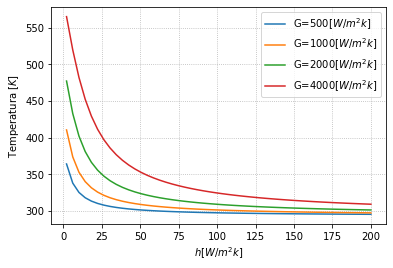

In [21]:
h_conv = np.linspace(2, 200)

fig, ax = plt.subplots()
ax.set(xlabel=r'$h[W/m^2k]$', ylabel=r'Temperatura $[K]$')

for j in [500, 1000, 2000, 4000]:
    T = []
    for i in h_conv:
        s=solve(q.subs({G:j, alpha:0.8, E:0.5, tinf:293, h:i, sigma:5.67E-8, tsur:303}))[1]
        T.append(s)
    ax.plot(h_conv, T, label=f'G={j}' + r'$[W/m^2k]$')
ax.grid(linestyle='dotted')
ax.legend()

In [11]:
q = Eq(q_cond - q_rad - q_conv, 0)
q

Eq(-\varepsilon*sigma*(T_s**4 - T_{sur}**4) - h*(T_s - T_{\infty}) - k*(-T_i + T_s)/L, 0)